# imports

In [7]:
%load_ext autoreload
%autoreload 2


In [8]:
import sys
sys.path.append('/mnt/home/cmodi/.local/lib/python3.8/site-packages/')

In [9]:
import sys, os
sys.path.append('../src/')

import loader_pk
import sbitools, sbiplots
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

In [10]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#  Sub boxes

In [11]:
from nbodykit.lab import FFTPower, ArrayMesh

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [69]:
# lh = 1877
lh = 0
f = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{lh:04d}/field.npy')
print(f.mean())

63.99999999999987


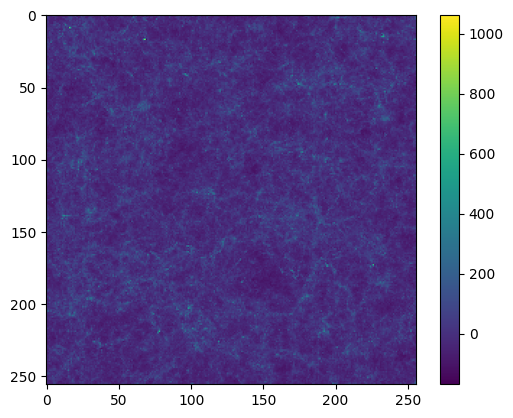

In [76]:
plt.imshow((f/f.mean() - 1.).sum(axis=0))
plt.colorbar()

In [381]:
# del x0, x1, y0, y1, z0, z1

0 128 0 128 0 128
mean :  63.06212987101891
0 128 0 128 128 256
mean :  65.00067407339789
0 128 128 256 0 128
mean :  64.29900737171923
0 128 128 256 128 256
mean :  65.15284759243896
128 256 0 128 0 128
mean :  64.55852873410555
128 256 0 128 128 256
mean :  62.849306760790085
128 256 128 256 0 128
mean :  65.93856932256469
128 256 128 256 128 256
mean :  61.138936273964674


[]

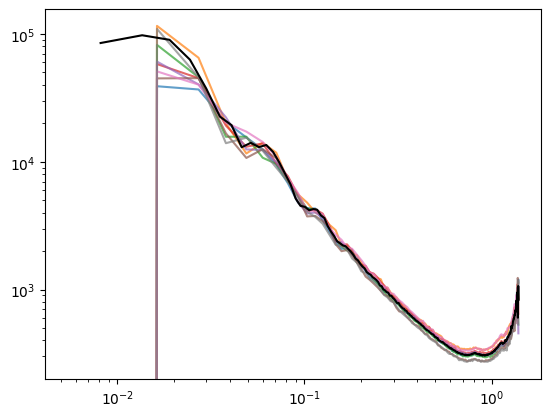

In [77]:
sys.path.append('../../galmodel/code/utils/')
import tools

fac = 2
kfull, pfull = tools.power(f/f.mean(), boxsize=1000)
mesh = ArrayMesh(f/f.mean(), BoxSize=1000)
pfullnb = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
pfullnb4 = FFTPower(mesh, mode='1d', dk=4*np.pi/1000, kmin=2*np.pi/1000*fac ).power


# x0, x1 = 0, 128
# y0, y1 = 0, 128
# z0, z1 = 0, 128
fac = 2
nc = 256 // fac 
psubs = []
psubsnb = []
for i in range(fac):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(fac):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(fac):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            box = sub*1.
            print('mean : ', box.mean())
            ksub, psub = tools.power(box/box.mean(), boxsize=1000/fac)
            mesh = ArrayMesh(box/box.mean(), BoxSize=1000/fac)
            pk = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
            psubsnb.append(pk['power'])
            plt.plot(ksub, psub, alpha=0.7)
            psubs.append(psub)

plt.plot(kfull[1:], pfull[1:], 'k')

plt.loglog()


[]

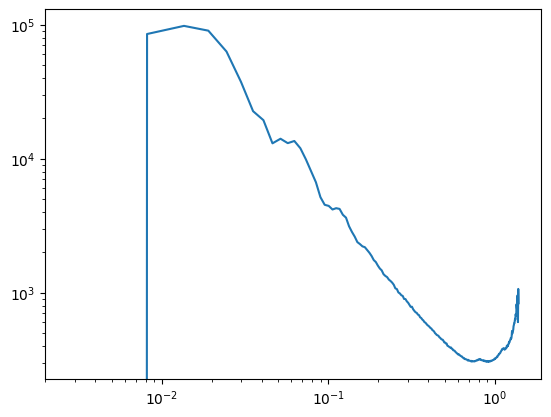

In [79]:
plt.plot(kfull, pfull)
plt.loglog()

In [247]:
# x = np.arange(27).reshape(3, 3, 3)
x = np.arange(5).reshape(5)
x, np.pad(x, (0, x.shape[0]-1), mode='symmetric'), np.pad(x, (0, x.shape[0]-2), mode='reflect')

(array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 4, 3, 2, 1]),
 array([0, 1, 2, 3, 4, 3, 2, 1]))

0 128 0 128 0 128
mean :  63.07101603103869


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0 128 0 128 128 256
mean :  65.05032524095598


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0 128 128 256 0 128
mean :  64.29577464745843


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0 128 128 256 128 256
mean :  65.19763504205112


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


128 256 0 128 0 128
mean :  64.59796117732259


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


128 256 0 128 128 256
mean :  62.880401508326


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


128 256 128 256 0 128
mean :  65.99578925927389


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


128 256 128 256 128 256
mean :  61.11096298783239


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

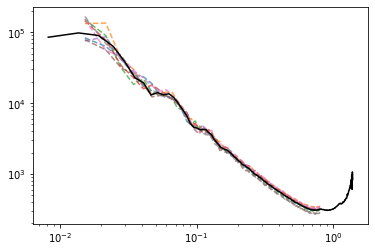

In [58]:
sys.path.append('../../galmodel/code/utils/')
import tools

kfull, pfull = tools.power(f/f.mean(), boxsize=1000
                          )
mesh = ArrayMesh(f/f.mean(), BoxSize=1000)
pfullnb = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
pfullnb4 = FFTPower(mesh, mode='1d', dk=4*np.pi/1000, kmin=2*np.pi/1000*fac ).power


# x0, x1 = 0, 128
# y0, y1 = 0, 128
# z0, z1 = 0, 128
fac = 2
nc = 256 // fac 
psubs2 = []
psubsnb2 = []
psubs3 = []
psubsnb3 = []
for i in range(fac):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(fac):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(fac):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            box = sub*1.
            box = np.pad(box, (0, box.shape[0]-1), mode='symmetric')            
            print('mean : ', box.mean())
            # ksub2, psub2 = tools.power(box/box.mean(), boxsize=1000/256*box.shape[0])
            # psubs2.append(psub2)
            # plt.plot(ksub2, psub2, alpha=0.7)
            
            mesh = ArrayMesh(box/box.mean(), BoxSize=1000/256*box.shape[0])
            pk2 = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
            psubsnb2.append(pk2['power'])
            plt.plot(pk2['k'], pk2['power'], alpha=0.7, ls='--')
            
            # box = sub*1.
            # box = np.pad(box, (0, box.shape[0]-2), mode='reflect')            
            # print('mean : ', box.mean())
            # ksub3, psub3 = tools.power(box/box.mean(), boxsize=1000/256*box.shape[0])
            # plt.plot(ksub3, psub3, alpha=0.7, ls='--')
            # psubs3.append(psub3)
            
            # mesh = ArrayMesh(box/box.mean(), BoxSize=1000/256*box.shape[0])
            # pk3 = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
            # psubsnb3.append(pk3['power'])
            # plt.plot(pk3['k'], pk3['power'], alpha=0.7, ls='--')
            
plt.plot(kfull[1:], pfull[1:], 'k')

plt.loglog()


In [43]:
# nmodes = 4* pi * k[1:]**2 * np.diff(k) * bs **3 /(2*pi)**3  * 2 #/ bs**3 
# var = 2*np.interp(k[1:], khfit, pkhfit)**2 / nmodes
# err = var**0.5
# plt.plot(err)

# # plt.plot(k0, p0/np.interp(k, ktest, pkhfit))
# # plt.plot(k, p1/np.interp(k, ktest, pkhfit))
# erry = err/np.interp(k[1:], khfit, pkhfit)
# pden = lambda k : np.interp(k, khfit, pkhfit)


Text(0, 0.5, 'P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)')

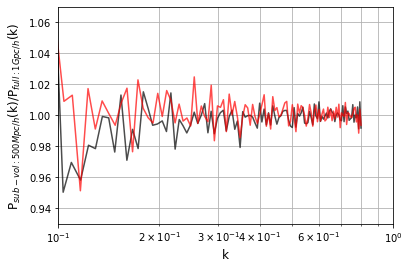

In [60]:
# nmodes_sub = 4* pi * k[1:]**2 * np.diff(k) * (bs/fac) **3 /(2*pi)**3  * 2 #/ bs**3 
# var_sub = 2*np.interp(k[1:], kfull, pfull)**2 / nmodes_sub
# err_sub = var_sub**0.5
# err_sub /= np.interp(ksub[1:], kfull, pfull)

# for i in range(fac**3):
for i in range(0):
    # plt.errorbar(ksub[1:], psub[1:]/np.interp(ksub[1:], kfull, pfull), err_sub, alpha=0.7)
    # plt.errorbar(ksub[1:], psubs[i][1:]/np.interp(ksub[1:], kfull, pfull), color=f'C{i}', alpha=0.7)
    plt.errorbar(pk['k'][1:], psubsnb[i][1:]/np.interp(pk['k'][1:], kfull, pfull), color=f'C{i}', alpha=0.7, ls='-')
    plt.errorbar(pk2['k'][1:], psubsnb2[i][1:]/np.interp(pk2['k'][1:], kfull, pfull), color=f'C{i}', alpha=0.7, ls='--')    
    plt.errorbar(pk3['k'][1:], psubsnb3[i][1:]/np.interp(pk3['k'][1:], kfull, pfull), color=f'C{i}', alpha=0.7, ls=':')

# plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7, ls="--")
plt.errorbar(pk['k'][1:], np.array(psubsnb).mean(axis=0)[1:]/np.interp(pk['k'][1:], kfull, pfull),  color='k', ls="-", alpha=0.7)

# plt.errorbar(ksub2, np.array(psubs2).mean(axis=0)/np.interp(ksub2, kfull, pfull),  color='r', alpha=0.7, ls="--")
plt.errorbar(pk2['k'][1:], np.array(psubsnb2).mean(axis=0)[1:]/np.interp(pk2['k'][1:], kfull, pfull),  color='r', ls="-", alpha=0.7)

# plt.errorbar(pk3['k'][1:], np.array(psubsnb3).mean(axis=0)[1:]/np.interp(pk3['k'][1:], kfull, pfull),  color='b', ls="-", alpha=0.7)

plt.semilogx()
plt.grid(which='both')
plt.ylim(0.9, 1.1)
plt.ylim(0.8, 1.2)
plt.xlim(0.1, 1.0) 
plt.ylim(0.93, 1.07)

plt.xlabel('k', fontsize=12)
plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

Text(0, 0.5, 'P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)')

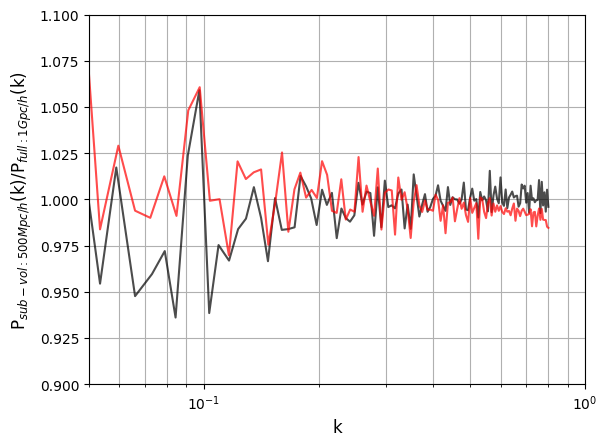

In [213]:
# nmodes_sub = 4* pi * k[1:]**2 * np.diff(k) * (bs/fac) **3 /(2*pi)**3  * 2 #/ bs**3 
# var_sub = 2*np.interp(k[1:], kfull, pfull)**2 / nmodes_sub
# err_sub = var_sub**0.5
# err_sub /= np.interp(ksub[1:], kfull, pfull)

# for i in range(fac**3):
# for i in range(4):
#     # plt.errorbar(ksub[1:], psub[1:]/np.interp(ksub[1:], kfull, pfull), err_sub, alpha=0.7)
#     plt.errorbar(ksub[1:], psubs[i][1:]/np.interp(ksub[1:], kfull, pfull), color=f'C{i}', alpha=0.7)
#     plt.errorbar(pk['k'][1:], psubsnb[i][1:]/np.interp(pk['k'][1:], kfull, pfull), color=f'C{i}', alpha=0.7, ls='--')

# plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7, ls="--")
plt.errorbar(pk['k'][1:], np.array(psubsnb).mean(axis=0)[1:]/np.interp(pk['k'][1:], kfull, pfull),  color='k', ls="-", alpha=0.7)

# plt.errorbar(ksub2, np.array(psubs2).mean(axis=0)/np.interp(ksub2, kfull, pfull),  color='r', alpha=0.7, ls="--")
plt.errorbar(pk2['k'][1:], np.array(psubsnb2).mean(axis=0)[1:]/np.interp(pk2['k'][1:], kfull, pfull),  color='r', ls="-", alpha=0.7)

# plt.plot(ksub, psub2/np.interp(ksub, kfull, pfull))
plt.semilogx()
plt.grid(which='both')
plt.ylim(0.9, 1.1)
plt.xlim(0.05, 1.0) 
# plt.ylim(0.95, 1.05)

plt.xlabel('k', fontsize=12)
plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

In [261]:
ksub.size, ksub2.size, pk['k'].size, pk2['k'].size

(64, 255, 124, 124)

/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

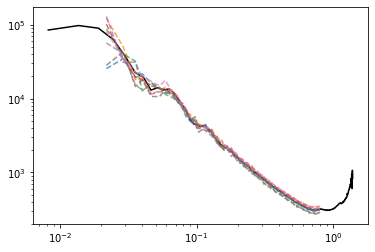

In [45]:
# for i in range(fac**3):
plt.plot(kfull[1:], pfull[1:], 'k-')
for i in range(8):
    # plt.errorbar(ksub[1:], psub[1:]/np.interp(ksub[1:], kfull, pfull), err_sub, alpha=0.7)
    # plt.errorbar(ksub[1:], psubs[i][1:], color=f'C{i}', alpha=0.7)
    plt.errorbar(pk['k'][1:], psubsnb[i][1:], color=f'C{i}', alpha=0.7, ls='--')
plt.loglog()

### with zero padding

0 128 0 128 0 128
0 128 0 128 128 256
0 128 128 256 0 128
0 128 128 256 128 256
128 256 0 128 0 128
128 256 0 128 128 256
128 256 128 256 0 128
128 256 128 256 128 256


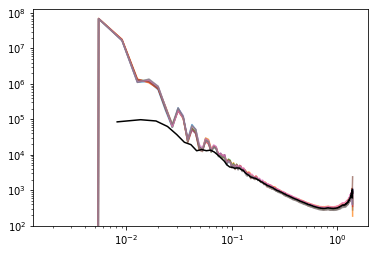

Text(0, 0.5, 'P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)')

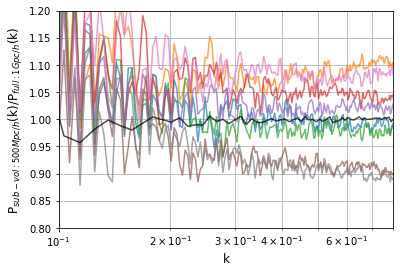

In [46]:
# WITH ZERO PADDING
psubs2 = []
for i in range(2):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(2):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(2):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            box = np.zeros([nc*3, nc*3, nc*3])
            box[nc:2*nc, nc:2*nc, nc:2*nc] = sub
            ksub2, psub2 = tools.power(box, boxsize=1000/fac*3)
            psub2 /= (3)**3
            plt.plot(ksub2, psub2, alpha=0.7)
            psubs2.append(psub2)

plt.plot(kfull[1:], pfull[1:], 'k')

plt.loglog()
plt.show()

###########
for psub2 in psubs2[:8]:
    plt.errorbar(ksub2[1:], psub2[1:]/np.interp(ksub2[1:], kfull, pfull), alpha=0.7)

plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7)
# plt.plot(ksub, psub2/np.interp(ksub, kfull, pfull))
plt.semilogx()
plt.grid(which='both')
plt.ylim(0.8, 1.2)
plt.xlim(0.1, 0.8) 

plt.xlabel('k', fontsize=12)
plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

Text(0, 0.5, 'P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)')

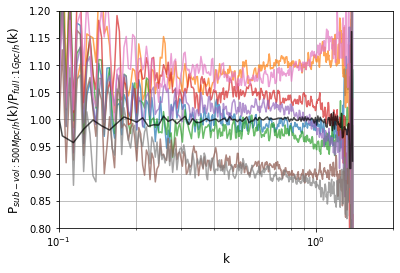

In [47]:
###########
for psub2 in psubs2[:8]:
    plt.errorbar(ksub2[1:], psub2[1:]/np.interp(ksub2[1:], kfull, pfull), alpha=0.7)

plt.errorbar(ksub, np.array(psubs).mean(axis=0)/np.interp(ksub, kfull, pfull),  color='k', alpha=0.7)
# plt.plot(ksub, psub2/np.interp(ksub, kfull, pfull))
plt.semilogx()
plt.grid(which='both')
plt.ylim(0.8, 1.2)
plt.xlim(0.1, 2.0) 

plt.xlabel('k', fontsize=12)
plt.ylabel('P$_{sub-vol: 500 Mpc/h}$(k)/P$_{full: 1 Gpc/h}$(k)', fontsize=12)

## loop over LH

In [90]:
def get_pksubs(f, fac=2, zeropad = False):

    nc = f.shape[0] // fac 
    psubs = []
    for i in range(fac):
        x0, x1 = nc*i, nc*(i+1)

        for j in range(fac):
            y0, y1 = nc*j, nc*(j+1)

            for ik in range(fac):
                z0, z1 = nc*ik, nc*(ik+1)            

            
                sub = f[x0:x1, y0:y1, z0:z1]
                if zeropad:
                    box = np.zeros([nc*3, nc*3, nc*3])
                    box[nc:2*nc, nc:2*nc, nc:2*nc] = sub
                    ksub2, psub2 = tools.power(box, boxsize=1000/fac*3)
                    psub2 /= (3)**3
                else:
                    box = sub*1.
                    mesh = ArrayMesh(box/box.mean(), BoxSize=1000/fac)
                    pk = FFTPower(mesh, mode='1d', dk=2*np.pi/1000*fac, kmin=2*np.pi/1000*fac ).power
                psubs.append(pk['power'])
    psubs = np.array(psubs)
    return pk['k'], psubs


fac = 2
for i in range(2000):
    if (i%50 == 0):print(i)
    f = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/field.npy')
    ksubs, psubs = get_pksubs(f, fac=fac)
    # print(psubs.shape)
    np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power_split{fac}-dk2.npy', psubs)
    np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//k_split{fac}-dk2.npy', ksubs)


0
50
100
150
200
250



KeyboardInterrupt



In [93]:
ksubs

array([0.01779928, 0.03015824, 0.0428958 , 0.05567322, 0.068702  ,
       0.08095774, 0.09353433, 0.1061645 , 0.11890725, 0.13155399,
       0.14395378, 0.15655722, 0.16940798, 0.18215204, 0.19458619,
       0.2070638 , 0.21960048, 0.23210862, 0.24473393, 0.25758376,
       0.27010542, 0.28249456, 0.29510998, 0.30757301, 0.32013151,
       0.33283365, 0.34550517, 0.3580747 , 0.3705952 , 0.38311999,
       0.39567279, 0.40831213, 0.42092475, 0.43346675, 0.44599611,
       0.45852401, 0.4710283 , 0.48368593, 0.4962661 , 0.508736  ,
       0.52135437, 0.5339219 , 0.54650468, 0.55912587, 0.57171384,
       0.58420877, 0.59670021, 0.60928356, 0.62186214, 0.63443363,
       0.64703751, 0.6596455 , 0.67225464, 0.68481456, 0.69736537,
       0.70997526, 0.72248463, 0.73501505, 0.74758188, 0.7601588 ,
       0.77275032, 0.78530442, 0.79790024])

[]

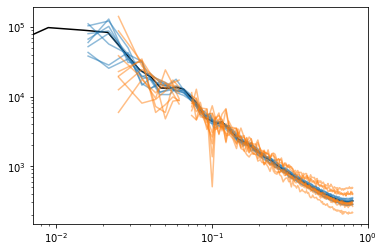

In [8]:
p0 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power.npy')
k, p0 = p0.T
p1 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power_split2.npy').real
p2 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/0000/power_split4.npy').real
k1 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split2.npy')
k2 = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split4.npy')
#
plt.plot(k, p0, 'k-')
for i in range(8):
    plt.plot(k1, p1[i], 'C0', alpha=0.5)
plt.loglog()
for i in range(8):
    plt.plot(k2, p2[i], 'C1', alpha=0.5)
plt.loglog()


(0.4, 1.5)

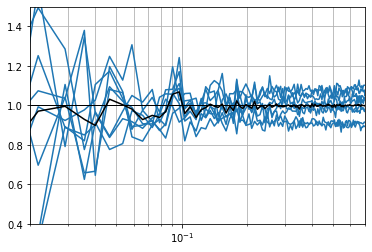

In [9]:
# plt.plot(k2, (p2/np.interp(k2, k, p0)).T, 'C1', alpha=0.7)
plt.plot(k1, (p1/np.interp(k1, k, p0)).T, 'C0')
plt.plot(k1, (p1.mean(axis=0)/np.interp(k1, k, p0)).T, 'k')
plt.semilogx()
plt.axhline(1, color='k', lw=1)
plt.grid(which='both')
plt.xlim(0.02, 0.7)
plt.ylim(0.4, 1.5)

(0.95, 1.05)

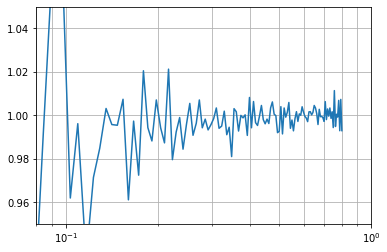

In [24]:
plt.plot(k1, p1.mean(axis=0)/p0[2:])
plt.xscale('log')
plt.grid(which='both')
plt.xlim(0.08, 1)
plt.ylim(0.95, 1.05)

(100.0, 5000.0)

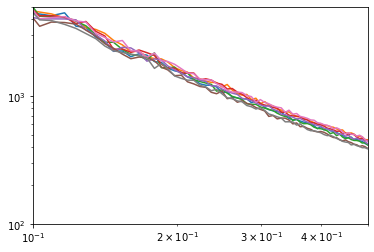

In [51]:
plt.plot(k1, p1.T)
plt.semilogx()
plt.loglog()
plt.xlim(0.1, 0.5)
plt.ylim(1e2, 5e3)

### combine

In [46]:

fac = 2
pk = []
for i in range(2000):
    if (i%100 == 0):print(i)
    # pk.append(np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power_split{fac}-sym.npy'))
    pk.append(np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power-dk2.npy'))

pk = np.array(pk)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [48]:
print(pk.shape)

(2000, 63, 2)


array([0.01957139, 0.03198397, 0.04432056, 0.0567436 , 0.06914289,
       0.08178471, 0.09438618, 0.10688622, 0.11941391, 0.13195692,
       0.14451693, 0.15711811, 0.16972297, 0.18232533, 0.19484204,
       0.20738836, 0.21994041, 0.2324651 , 0.24502511, 0.25762387,
       0.27020777, 0.28278117, 0.2953225 , 0.30786389, 0.32046061,
       0.33305738, 0.34561955, 0.35813415, 0.37066956, 0.3832611 ,
       0.39586857, 0.40846713, 0.42100142, 0.43353679, 0.44608442,
       0.45867144, 0.47127593, 0.48383111, 0.4963641 , 0.50890707,
       0.52149189, 0.53408064, 0.54664695, 0.55921832, 0.57177889,
       0.58433395, 0.59689856, 0.60945952, 0.62202303, 0.63459826,
       0.64717086, 0.65973183, 0.6723072 , 0.68488272, 0.69744034,
       0.71000474, 0.72257878, 0.73514872, 0.74769579, 0.76024917,
       0.77283525, 0.78542766, 0.79797596])

In [53]:
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power-dk2.npy', pk)
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k-dk2.npy', pk[0, :, 0])



In [92]:
f0 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power.npy')
k0, f0 = f0[0, :, 0], f0[..., 1]
f1 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split{fac}.npy').mean(axis=1)
k1 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split{fac}.npy')
f2 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split{fac}-sym.npy').mean(axis=1)
k2 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split{fac}-sym.npy')

k = k0[(0.1 < k0) & (k0 < 0.5)]
f0 = f0[:, (0.1 < k0) & (k0 < 0.5)]
f1 = f1[:, (0.1 < k1) & (k1 < 0.5)]
f2 = f2[:, (0.1 < k2) & (k2 < 0.5)]

Text(0, 0.5, '$\\bar{P}_{sub}/P_{true}$')

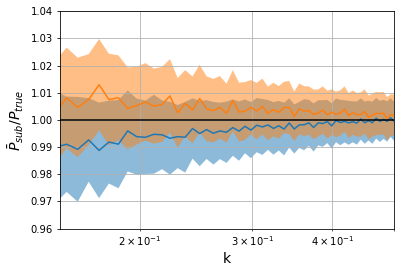

In [116]:
plt.plot(k, (f1/f0).mean(axis=0))
plt.fill_between(k, (f1/f0).mean(axis=0) - (f1/f0).std(axis=0), (f1/f0).mean(axis=0) + (f1/f0).std(axis=0), alpha=0.5)
plt.plot(k, (f2/f0).mean(axis=0))
plt.fill_between(k, (f2/f0).mean(axis=0) - (f2/f0).std(axis=0), (f2/f0).mean(axis=0) + (f2/f0).std(axis=0), alpha=0.5)
plt.axhline(1, color='k')
plt.ylim(0.96, 1.04)
plt.grid(which='both')
plt.xlim(0.15, 0.5)
plt.xscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r"$\bar{P}_{sub}/P_{true}$", fontsize=14)


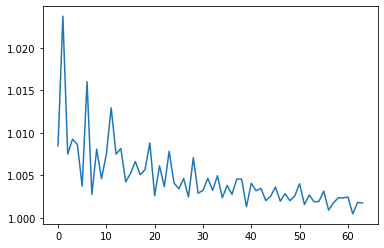

In [266]:
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split{fac}-sym.npy', pk.real)
# np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256//power_split2.npy').shape


In [144]:
f3 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power.npy')


In [147]:
f = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power_split1-dk2.npy')
fk = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split1-dk2.npy')
f = np.squeeze(f)
f.shape, fk.shape

((2000, 63), (63,))

In [148]:
f2 = np.stack([np.repeat(fk.reshape(1, -1), f.shape[0], axis=0), f], axis=2)
f2.shape

(2000, 63, 2)

In [158]:
# np.save('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power-dk2.npy', f2)

[]

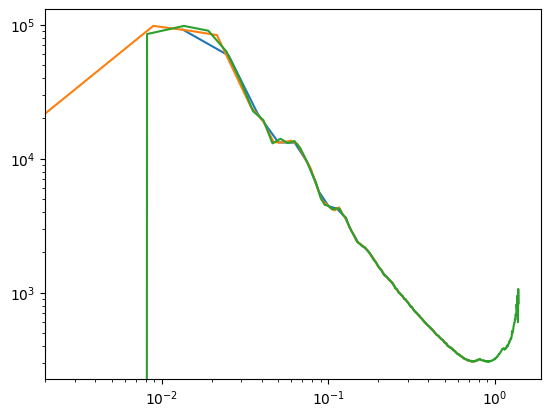

In [156]:
plt.plot(f2[0, :, 0], f2[0, :, 1])
plt.plot(f3[0, :, 0], f3[0, :, 1])
plt.plot(kfull, pfull)

plt.loglog()

# check loader

In [7]:
sys.path.append('../src/')
import sbitools
import loader_pk_splits as loader
import yaml
import loader_pk, loader_hybrid

In [8]:
cfgd_dict = yaml.load(open('../scripts/snle/config_pk_splits.yaml'), Loader=yaml.Loader)
args = {}
for i in cfgd_dict.keys():
    args.update(**cfgd_dict[i])
cfgd = sbitools.Objectify(**args)



In [12]:
kcut, features, params = loader.loader(cfgd, return_k=True)

Loaded power spectrum data with shape :  (2000, 1, 124)
now process
pk shape after k-cuts :  (2000, 1, 56)


In [116]:
features.shape, params.shape

((2000, 4, 56), (2000, 4, 6))

In [117]:
params[0:2]

array([[[1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 5.79833437e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 5.39041594e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 7.02360373e+04],
        [1.75500000e-01, 6.68100000e-02, 7.73700000e-01, 8.84900000e-01,
         6.64100000e-01, 3.09368460e+04]],

       [[2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 6.13030029e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 3.05661853e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 4.80309851e+04],
        [2.13900000e-01, 5.55700000e-02, 8.59900000e-01, 9.78500000e-01,
         8.61900000e-01, 7.70060889e+04]]])

In [118]:
data = sbitools.test_train_split(features, params, train_size_frac=0.85)

Loading test-train split index from /mnt/ceph/users/cmodi/contrastive/analysis/test-train-splits/train-N2000-f0.15-S0.npy
Successfully loaded


In [119]:
data.trainx.shape

(6800, 56)

## hybrid

In [7]:
sys.path.append('../src/')
import sbitools
# import loader_pk_splits as loader
import yaml
import loader_hybrid

In [30]:
cfgd_dict = yaml.load(open('../scripts/hybrid/config_pk_hybrid.yaml'), Loader=yaml.Loader)
args = {}
for i in cfgd_dict.keys():
    args.update(**cfgd_dict[i])
cfgd = sbitools.Objectify(**args)
#
cfgd.analysis_path = loader_hybrid.folder_path(cfgd_dict)
print(cfgd.analysis_path )
os.makedirs(cfgd.analysis_path, exist_ok=True)
k, kcond, features, params = loader_hybrid.loader(cfgd, return_k=True)

key-val pair :  kmax 0.5
key-val pair :  kmin 0.001
key-val pair :  ksplit 0.1
key-val pair :  logit True
key-val pair :  logit_cond True
key-val pair :  nsubs 8
key-val pair :  splits 2
key-val pair :  standardize True
key-val pair :  standardize_cond True
/mnt/ceph/users/cmodi/HySBI/matter/networks/hybrid/kmax0.5-kmin0.001-ksplit0.1-logit-logit_cond-nsubs8-splits2-standardize-standardize_cond/
Loaded power spectrum data with shape :  (2000, 8, 126)
pk shape after k-cuts :  (2000, 8, 64)
Loaded power spectrum conditioning data with shape :  (2000, 127, 2)
pk shape after k-cuts :  (2000, 15)


In [31]:
print(features.shape, params.shape)

(2000, 8, 64) (2000, 8, 20)


[]

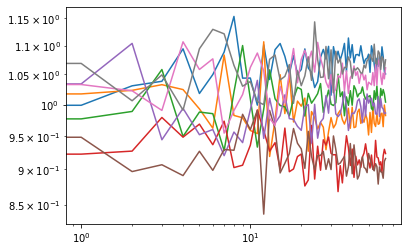

In [32]:
plt.plot((features[0]/features[0].mean(axis=0)).T)
plt.loglog()

In [33]:
features[0][0]/features[0][2]

array([1.00005984, 1.02231999, 1.04242939, 0.98111758, 1.15262687,
       1.03058517, 1.0655301 , 1.17337691, 1.13044831, 0.94851726,
       1.03431734, 1.07045994, 1.10969072, 0.98442505, 1.08298425,
       1.10576055, 1.08543452, 1.07049667, 1.07231907, 1.02179606,
       1.03275069, 1.11494157, 1.04206853, 1.05086534, 1.01815008,
       1.01976114, 1.04353431, 1.10762975, 1.0688906 , 1.0734844 ,
       1.01478772, 1.10010276, 1.07246324, 1.03807821, 1.06116245,
       1.06523267, 1.12451841, 1.04199745, 1.11537552, 1.05463185,
       1.10322329, 1.03799031, 1.05794615, 1.07118921, 1.0633135 ,
       1.07954112, 1.05175383, 1.05192177, 1.066828  , 1.06470243,
       1.07103083, 1.03853532, 1.10715093, 1.09789493, 1.04356122,
       1.04362306, 1.04593243, 1.06776381, 1.08721879, 1.03752847,
       1.08218199, 1.05484012, 1.03709411, 1.04681033])

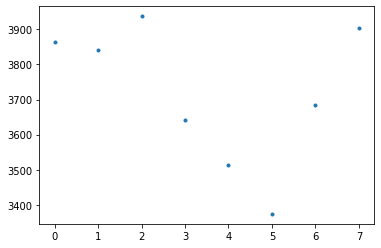

In [34]:
plt.plot(features[0][:, 3], '.')

In [30]:
params.min(axis=0), params.max(axis=0)

(array([[ 0.1001    ,  0.03001   ,  0.5001    ,  0.8001    ,  0.6001    ,
         -0.44283997, -0.5746636 , -0.76039811, -1.04144112, -1.35314042,
         -1.48438993, -1.50740171, -1.42900056, -1.37013073, -1.40882946,
         -1.4976671 , -1.6075505 , -1.67229917, -1.67114684, -1.63946683,
         -1.60403869, -1.59897868, -1.58093827, -1.5802693 , -1.55298202,
         -1.5948792 , -1.58070426, -1.53577548]]),
 array([[ 0.4999    ,  0.06999   ,  0.8999    ,  1.1999    ,  0.9999    ,
         12.67360505, 11.33361727,  7.53389052,  8.2692339 ,  7.09837098,
          5.64076698,  5.07508914,  5.07630465,  5.41534873,  5.57248269,
          5.78885784,  6.04061576,  6.52548889,  6.66686338,  6.38512018,
          6.25980875,  6.13351923,  6.13426975,  6.13164352,  6.312188  ,
          6.18880061,  6.25488844,  6.22954519]]))

In [40]:
# cfgd_dict = yaml.load(open('../scripts/hybrid/config_pk_hybrid.yaml'), Loader=yaml.Loader)
# args = {}
# for i in cfgd_dict.keys():
#     args.update(**cfgd_dict[i])
# cfgd = sbitools.Objectify(**args)

# k2, kcond2, features2, params2 = loader_hybrid.loader(cfgd, return_k=True)

In [41]:
loader_hybrid.folder_path(cfgd_dict)

key-val pair :  kmax 0.5
key-val pair :  kmin 0.001
key-val pair :  ksplit 0.15
key-val pair :  logit True
key-val pair :  nsubs 1
key-val pair :  splits 1
key-val pair :  standardize True


'/mnt/ceph/users/cmodi/HySBI/matter/networks/hybrid/kmax0.5-kmin0.001-ksplit0.15-logit-nsubs1-splits1-standardize/'

In [67]:
pk = np.load('/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power_split2.npy')
pk.shape

(2000, 8, 126)

In [74]:
idx = np.random.randint(0, 8, 2000*2).reshape(2000, -1)
idx.shape

(2000, 2)

In [82]:
idx = np.random.randint(0, 8, 2)
print(idx)
pk[0][idx].shape

[7 1]


(2, 126)

In [87]:
pk2 = []
for i in range(pk.shape[0]):
    idx = np.random.randint(0, 8, 2)
    pk2.append(pk[i][idx])
pk2 = np.array(pk2)
pk2.shape

(2000, 2, 126)

# Numerical convolution from Oliver

In [12]:
import numpy as np
import density_field_library as DFL
import Pk_library as PKL
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

# import pyfftw

grid              = int(256)    #grid size
BoxSize           = 1000.0 #Mpc/h
Rayleigh_sampling = 1      #whether sampling the Rayleigh distribution for modes amplitudes
threads           = 1      #number of openmp threads

# Define fundamental and Nyquist modes
kF,kN,_,_,kmax = PKL.frequencies(BoxSize, grid)
print(kF, kN, kmax)

## Compute smooth window
x_arr = np.arange(grid)
filt1d = np.empty(grid)
filt1d[x_arr > grid//2] = 0.
filt1d[x_arr<grid//2] = 1.
filt = np.asarray(np.meshgrid(*[filt1d for _ in range(3)])).prod(axis=0)

0.006283185307179587 0.8042477193189871 221


In [398]:
filt1d.sum(), filt.sum()/nc**3;

In [399]:
dk = 2*np.pi/BoxSize
kmin = 2*np.pi/BoxSize
print(np.arange(kmin, kN, dk).size)
print(dk, kmin, kF)
k_arr_all = np.arange(kmin, kN, kF)


127
0.006283185307179587 0.006283185307179587 0.006283185307179587


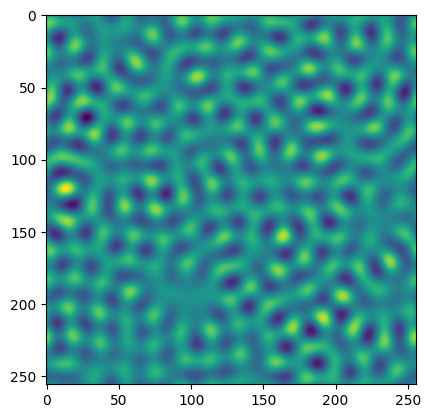

In [520]:
# Create k and P arrays
pk_index = 5 
seed = 0
k_arr = list(np.arange(0, 2*kF*(pk_index+1)-1e-10, 2*kF))+\
                [2*kF*(pk_index+1)*(1-1e-10), 2*kF*(pk_index+1), 2*kF*(pk_index+2)*(1-1e-10), 2*kF*(pk_index+2)]+\
                    list(np.arange(2*kF*(pk_index+2)+1e-6, kN, 2*kF))
k_arr = np.asarray(k_arr)
pk_arr = np.zeros_like(k_arr)
pk_arr[(k_arr>=(pk_index+1)*2*kF)&(k_arr<(pk_index+2)*2*kF)] = 1.

density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, seed,
                              BoxSize, 1, False)
density_cut = density_r*filt

kvals = FFTPower(ArrayMesh(density_r, BoxSize=BoxSize), mode='1d', dk=kF, kmin=kF).power['k']

plt.imshow(density_r.sum(axis=0))
plt.show()


# # Create k and P arrays
# pk_index = 5
# # k_arr = np.arange(kmin, kN, 2*dk)
# k_arr = np.arange(0, kN, 2*kF)
# pk_arr = np.zeros_like(k_arr)
# pk_arr[pk_index] = 1.

# density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, seed,
#                               BoxSize, 1, False)

# plt.imshow(density_r.sum(axis=0))

In [526]:
tmp = density_r[:grid//2, :grid//2, :grid//2]
tmp2 = np.pad(tmp, ((0, grid//2), (0, grid//2), (0, grid//2)))

In [533]:
(density_cut-tmp2);

In [401]:
def compute_pk_out(pk_index, seed, kmax=10, plot=False):

    # Create k and P arrays
    k_arr = list(np.arange(0,2*kF*(pk_index+1)-1e-10,2*kF))+[2*kF*(pk_index+1)*(1-1e-10),2*kF*(pk_index+1),2*kF*(pk_index+2)*(1-1e-10),2*kF*(pk_index+2)]+list(np.arange(2*kF*(pk_index+2)+1e-6,kN,2*kF))
    k_arr = np.asarray(k_arr)
    pk_arr = np.zeros_like(k_arr)
    # Add power to a specific mode only
    pk_arr[(k_arr>=(pk_index+1)*2*kF)&(k_arr<(pk_index+2)*2*kF)] = 1.
    
    density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, seed+pk_index*1000,
                                  BoxSize, 1, False)
    
    # Now cut this down and zero-pad it , remove mean
    density_cut = density_r*filt
    density_cut -= np.mean(density_cut)
    
    if plot: 
        plt.imshow(density_cut[:,:,:grid//2].mean(axis=2))
        plt.show()
    
    # Compute power spectrum (dropping first mode [old fundamental])
    Pk = PKL.Pk(density_cut.astype(np.float32), BoxSize, -1, 'None', threads, False)
    k_out = Pk.k3D[1:]
    Pk_out = Pk.Pk[1:,0]
    Nmodes = Pk.Nmodes3D[1:]
    
    # Rebin since fundamental has changed
    k_out =  (k_out[1::2]*Nmodes[1::2] +k_out[:-1:2] *Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])
    Pk_out = (Pk_out[1::2]*Nmodes[1::2]+Pk_out[:-1:2]*Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])
    
    return k_arr, pk_arr, k_out[k_out<kmax], Pk_out[k_out<kmax]

In [402]:
# def compute_pk_out2(pk_index, seed, kmax=0.3, plot=False):

#     # Create k and P arrays
#     k_arr = list(np.arange(kmin, kmin + kF*(pk_index+1)-1e-10, kF)) + \
#                             [kmin + kF*(pk_index+1)*(1-1e-10), kmin + kF*(pk_index+1), kmin + kF*(pk_index+2)*(1-1e-10), kmin + kF*(pk_index+2)] +\
#                             list(kmin + np.arange(kF*(pk_index+2)+1e-6, 2*kN, kF))
#     k_arr = np.asarray(k_arr)
#     pk_arr = np.zeros_like(k_arr)
#     # Add power to a specific mode only
#     pk_arr[(k_arr >= (kmin + (pk_index+1)*kF)) & (k_arr < (kmin + (pk_index+2)*kF))] = 1.

#     # k_arr = np.arange(kmin, 2*kN, dk)
#     # pk_arr = np.zeros_like(k_arr)
#     # pk_arr[pk_index] = 1.
#     # print(k_arr[pk_index])
    
#     density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, int(seed+pk_index*1000),
#                                   BoxSize, 1, False)
    
#     density_cut = density_r*filt    
#     # Remove mean of map
#     density_cut -= np.mean(density_cut)    
#     if plot: plt.imshow(density_cut[:,:,:grid//2].mean(axis=2))
    
#     # Compute power spectrum (dropping first mode [old fundamental])
#     mesh = ArrayMesh(density_cut, BoxSize=BoxSize)
#     pk = FFTPower(mesh, mode='1d', kmin=kmin, dk=dk).power
#     k_out, pk_out = pk['k'], pk['power'].real
    
#     return k_arr, pk_arr, k_out, pk_out


In [403]:
# def compute_pk_out2(pk_index, seed, kmax=10, plot=False, verbose=False):

#     # Create k and P arrays
#     # k_arr = list(np.arange(kmin, kmin + kF*(pk_index+1)-1e-10, kF)) + \
#     #                         [kmin + kF*(pk_index+1)*(1-1e-10), kmin + kF*(pk_index+1), kmin + kF*(pk_index+2)*(1-1e-10), kmin + kF*(pk_index+2)] +\
#     #                         list(kmin + np.arange(kF*(pk_index+2)+1e-6, 2*kN, kF))
    
#     k1, k2 = kmin + kF*(pk_index), kmin + kF*(pk_index + 1) 
#     klow, khigh = k1 - 1e-4, k2 - 1e-4
#     if klow > kmin:        
#         k_arr = list(np.arange(kmin, klow, kF)) + [klow, k1, khigh] +list(np.arange(k2, 2*kN, kF))
#     else:    
#         k_arr = [klow, k1, khigh] +list(np.arange(k2, 2*kN, kF))
        
#     k_arr = np.asarray(k_arr)
#     pk_arr = np.zeros_like(k_arr)
#     pk_arr[(k_arr>=klow) & (k_arr<k2)] = 1.    
#     if verbose: print(k_arr, pk_arr)
    
#     density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, seed+pk_index*1000,
#                                   BoxSize, 1, False)
    
#     # Now cut this down and zero-pad it , remove mean
#     density_cut = density_r*filt
#     density_cut -= np.mean(density_cut)
#     if plot: 
#         plt.imshow(density_cut[:,:,:grid//2].mean(axis=2))
#         plt.show()
        
#     # Compute power spectrum (dropping first mode [old fundamental])
#     # Pk = PKL.Pk(density_cut.astype(np.float32), BoxSize, -1, 'None', threads, False)
#     # k_out = Pk.k3D[1:]
#     # Pk_out = Pk.Pk[1:,0]
#     # Nmodes = Pk.Nmodes3D[1:]
#     Pk = FFTPower(ArrayMesh(density_cut.astype(np.float32), BoxSize), mode='1d', kmin=kF, dk=kF).power
#     k_out = Pk['k']
#     Pk_out = Pk['power']
#     Nmodes = Pk['modes']
#     # print(k_out.shape, k_out)
    
#     # Rebin since fundamental has changed
#     k_out =  (k_out[1::2]*Nmodes[1::2] +k_out[:-1:2] *Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])
#     Pk_out = (Pk_out[1::2]*Nmodes[1::2]+Pk_out[:-1:2]*Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])
    
#     return k_arr, pk_arr, k_out[k_out<kmax], Pk_out[k_out<kmax]

In [404]:
from nbodykit.mockmaker import gaussian_real_fields

In [405]:
def compute_pk_out3(pk_index, seed, fac=2, kmax=kN, plot=False, verbose=False):

#     # Create k and P arrays
    
    kmin, kF = 2*np.pi/BoxSize *fac, 2*np.pi/BoxSize *fac, 
    # kmin, kF = np.pi/BoxSize *fac, np.pi/BoxSize *fac, 
    k1, k2 = kmin + kF*(pk_index), kmin + kF*(pk_index + 1) 
    klow, khigh = k1 - 1e-4, k2 - 1e-4
    if k2> kmax:
        print(f"Upper edge of the bin = {k2}, is greater than kmax = {kmax}")
        raise 
    if verbose: print(kmin, k1, k2, kN)
    if klow >= kmin:        
        k_arr = list(np.arange(kmin, klow, kF)) + [klow, k1, khigh] +list(np.arange(k2, kmax, kF))
    else:    
        print('klow < kmin')
        k_arr = [klow, k1, khigh] +list(np.arange(k2, kmax, kF))
        
    k_arr = np.asarray(k_arr)
    pk_arr = np.zeros_like(k_arr)
    pk_arr[(k_arr>klow) & (k_arr<k2)] = 1.    
    if verbose: print(k_arr, pk_arr)

    mesh = ArrayMesh(np.zeros([grid, grid, grid]).astype(np.float32)*0., BoxSize)
    ipk = lambda x: np.interp(x, k_arr, pk_arr)
    density_r = gaussian_real_fields(mesh.pm, ipk, seed + pk_index*987, unitary_amplitude=True)[0]
        
    density_r = density_r[...]
    # density_r = DFL.gaussian_field_3D(grid, k_arr.astype(np.float32), pk_arr.astype(float32), 1, seed+pk_index*1000,
    #                               BoxSize, 1, False)
    
    # Now cut this down and zero-pad it , remove mean
    density_cut = density_r*filt
    density_cut -= np.mean(density_cut)
    if plot: 
        plt.imshow(density_cut[:,:,:grid//2].mean(axis=2))
        plt.show()
    
    # # Compute power spectrum (dropping first mode [old fundamental])
    # Pk = PKL.Pk(density_cut.astype(np.float32), BoxSize, -1, 'None', threads, False)
    # k_out = Pk.k3D[1:]
    # Pk_out = Pk.Pk[1:,0]
    # Nmodes = Pk.Nmodes3D[1:]
    # # Rebin since fundamental has changed
    # k_out =  (k_out[1::2]*Nmodes[1::2] +k_out[:-1:2] *Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])
    # Pk_out = (Pk_out[1::2]*Nmodes[1::2]+Pk_out[:-1:2]*Nmodes[:-1:2])/(Nmodes[1::2]+Nmodes[:-1:2])

    Pk = FFTPower(ArrayMesh(density_cut.astype(np.float32), BoxSize), mode='1d', kmin=kmin, dk=kF).power
    k_out = Pk['k']
    Pk_out = Pk['power'].real
    Nmodes = Pk['modes']
    if verbose:
        print(k_out.shape, k_out)
        print(Pk_out)
        print(Nmodes)
    
    
    return k_arr, pk_arr, k_out[k_out<kmax], Pk_out[k_out<kmax]

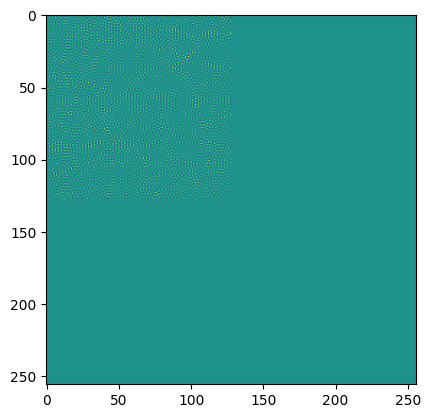

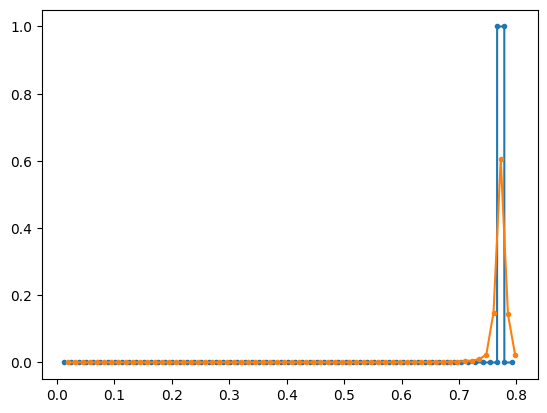

In [406]:
# k_in, pk_in, k_out, pk_out = compute_pk_out(20, 0, plot=True)
# plt.plot(k_in, pk_in, marker='.')
# plt.plot(k_out, pk_out/np.mean(filt**2))
# plt.show()
k_in, pk_in, k_out, pk_out = compute_pk_out3(60, 0, fac=2, plot=True, verbose=False)
plt.plot(k_in, pk_in, marker='.')
plt.plot(k_out, pk_out/np.mean(filt**2), marker='.')
plt.show()


In [407]:
# N_seed = 1
# #  Pk_mats = np.zeros((N_seed,len(k_out),len(k_out)))
# # Pk_mats = np.zeros((N_seed, len(k_arr_all), len(k_arr_all)//2))
# Pk_mats = np.zeros((N_seed, len(k_arr_all)//2, len(k_arr_all)//2))
# # Pk_mats = np.zeros((N_seed, len(k_arr_all), len(k_arr_all)))

# for seed in range(N_seed):
#     print("Using seed %d"%seed)
#     for index in range(Pk_mats.shape[1]):
#         if index %10 == 0 : print(index)
#         Pk_mats[seed,index] = compute_pk_out3(index, seed=1)[-1]
        
# Pk_mat = Pk_mats.mean(axis=0)


In [408]:
k_out.size


63

In [409]:
N_seed = 1
Pk_mats = []
# np.zeros((N_seed, len(k_arr_all)//2, len(k_arr_all)//2))

for seed in range(N_seed):
    print("Using seed %d"%seed)

    m = np.zeros((k_arr_all.size//2, k_arr_all.size//2))
    # m = np.zeros((k_arr_all.size, k_arr_all.size))
    for index in range(m.shape[0]):
        if index %10 == 0 : print(index)
        m[index] = compute_pk_out3(index, seed=1)[-1]
    Pk_mats.append(m)
    
# Pk_mat = np.stack(Pk_mats, axis=0).mean(axis=0)
Pk_mat = np.stack(Pk_mats, axis=0).mean(axis=0)
Pk_mat.shape

Using seed 0
0
klow < kmin
10
20
30
40
50
60


(63, 63)

In [410]:
Pk_mat = np.stack(Pk_mats, axis=0).mean(axis=0)
Pk_mat.shape

(63, 63)

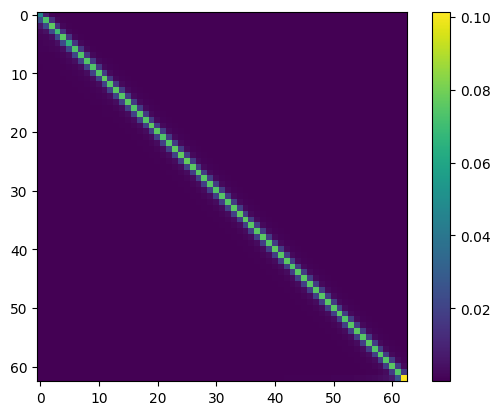

In [411]:
plt.imshow(Pk_mat)
# plt.imshow(Pk_mat2)
plt.colorbar();

In [412]:
np.linalg.inv(Pk_mat);

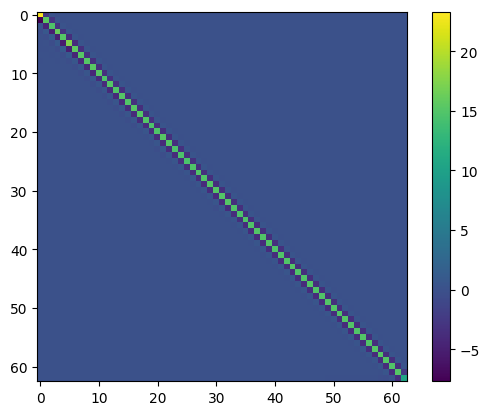

In [413]:
plt.imshow(np.linalg.inv(Pk_mat[:, :]))
# plt.imshow(np.linalg.inv(Pk_mat2))
plt.colorbar();

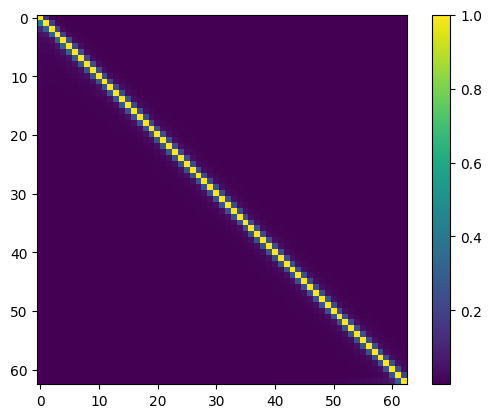

In [414]:
corr = Pk_mat/np.sqrt(np.outer(np.diag(Pk_mat),np.diag(Pk_mat)))
plt.imshow(corr);plt.colorbar();

## Check that it works

[]

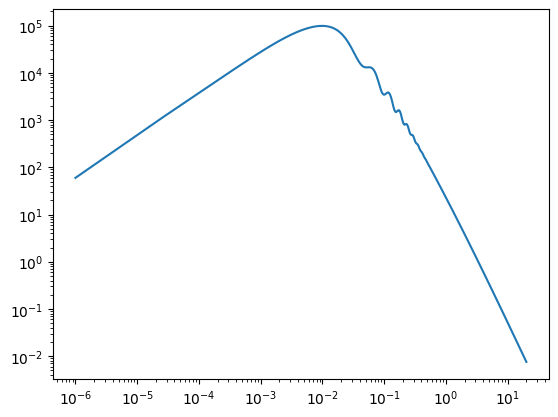

In [415]:
plin = np.load('../data/pklin_quijote_lextrap.npy')[0]
klin = np.load('../data/klin_quijote_lextrap.npy')
plt.plot(klin, plin)
plt.loglog()

In [416]:
ipklin = iuspline(klin, plin)

In [417]:
def compute_sim(seed, plot=False, kmax=kN, fac=2):

    mesh = ArrayMesh(np.zeros([grid, grid, grid]).astype(np.float32)*0., BoxSize)
    density_r = gaussian_real_fields(mesh.pm, ipklin, seed, unitary_amplitude=True)[0]
    density_r = density_r[...]
    density_cut = density_r*filt
    density_cut -= np.mean(density_cut)
    if plot: 
        plt.imshow(density_cut[:,:,:grid//2].mean(axis=2))
        plt.show()
    
    kmin, kF = 2*np.pi/BoxSize *fac, 2*np.pi/BoxSize *fac,     
    Pk = FFTPower(ArrayMesh(density_cut.astype(np.float32), BoxSize), mode='1d', kmin=kmin, dk=kF).power
    k_out = Pk['k']
    Pk_out = Pk['power'].real
    Nmodes = Pk['modes']
    return k_out, Pk_out

In [512]:
Nmc = 2
pksub = []
for j in range(Nmc):
    print(j)
    ksub, p = compute_sim(j)
    pksub.append(p)
    
pksub = np.stack(pksub, axis=0)

0
1


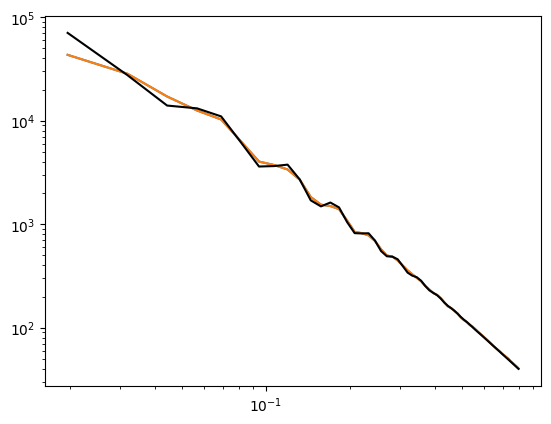

In [513]:
for j in range(Nmc):
    plt.plot(ksub, pksub[j]/np.mean(filt**2))
plt.loglog()
plt.plot(ksub, ipklin(ksub), color='k')

In [514]:
Pk_mat;

In [515]:
inv_mat = np.linalg.inv(Pk_mat).T
pksubC = np.stack([inv_mat@Pk for Pk in pksub], axis=0)


(0.1, 0.6)

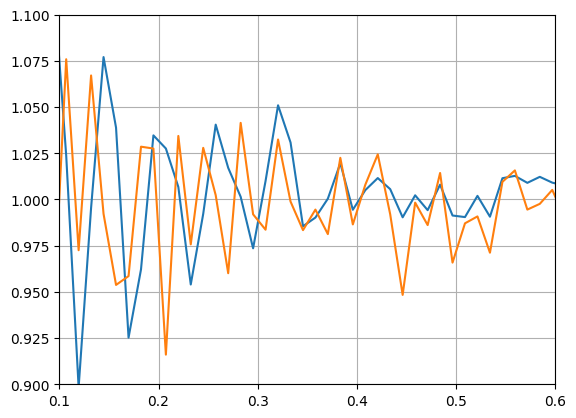

In [516]:
plt.plot(ksub, pksub.mean(axis=0)/np.mean(filt**2) / ipklin(ksub))
plt.plot(ksub, pksubC.mean(axis=0) / ipklin(ksub))
# plt.semilogx()
plt.grid(which='both')
plt.ylim(0.9, 1.1)
plt.xlim(0.1, 0.6)

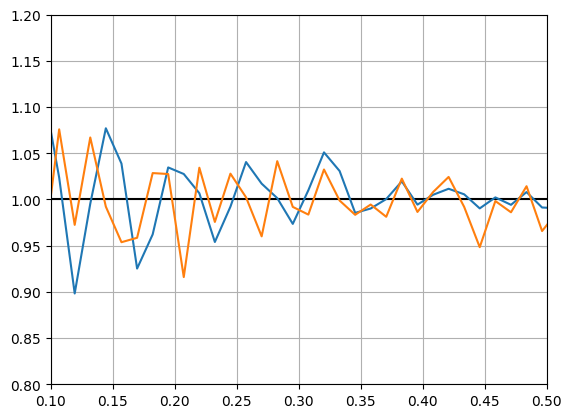

In [517]:
plt.errorbar(ksub, pksub.mean(axis=0)/np.mean(filt**2) / ipklin(ksub), pksub.std(axis=0)/np.mean(filt**2) / ipklin(ksub))
plt.errorbar(ksub, pksubC.mean(axis=0)/ ipklin(ksub), pksubC.std(axis=0) / ipklin(ksub))
# plt.semilogx()
plt.grid(which='both')
plt.ylim(0.8, 1.2)
plt.xlim(0.1, 0.5)
plt.axhline(1, color='k')

# load

In [13]:
!ls ../data/conv_matrix_f2/

M0-copy.npy  M15.npy	  M20.npy  M27.npy  M33.npy  M3.npy   M46.npy  M6.npy
M0.npy	     M16.npy	  M21.npy  M28.npy  M34.npy  M40.npy  M47.npy  M7.npy
M10.npy      M17.npy	  M22.npy  M29.npy  M35.npy  M41.npy  M48.npy  M8.npy
M11.npy      M18.npy	  M23.npy  M2.npy   M36.npy  M42.npy  M49.npy  M9.npy
M12.npy      M19.npy	  M24.npy  M30.npy  M37.npy  M43.npy  M4.npy
M13.npy      M1-copy.npy  M25.npy  M31.npy  M38.npy  M44.npy  M50.npy
M14.npy      M1.npy	  M26.npy  M32.npy  M39.npy  M45.npy  M5.npy


In [14]:
ms = np.stack([np.load(f'../data/conv_matrix_f2/M{i}.npy') for i in range(50)] , axis=0)
mm = ms.mean(axis=0)
imm = np.linalg.inv(mm).T

In [15]:
np.pad(density_cut, density_r.shape[0] - nc).shape



NameError: name 'density_cut' is not defined

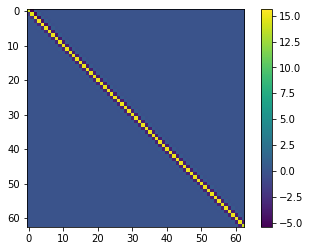

In [16]:
# # plt.imshow(m)
# plt.imshow(np.linalg.inv(ms[20]))
plt.imshow(np.linalg.inv(mm).T)
plt.colorbar()

## for sim

In [384]:
 # lh = 1877
lh = 0
f = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{lh:04d}/field.npy')
print(f.mean())


63.99999999999987


0 128 0 128 0 128
mean :  63.06212987101891
0 128 0 128 128 256
mean :  65.00067407339789
0 128 128 256 0 128
mean :  64.29900737171923
0 128 128 256 128 256
mean :  65.15284759243896
128 256 0 128 0 128
mean :  64.55852873410555
128 256 0 128 128 256
mean :  62.849306760790085
128 256 128 256 0 128
mean :  65.93856932256469
128 256 128 256 128 256
mean :  61.138936273964674


[]

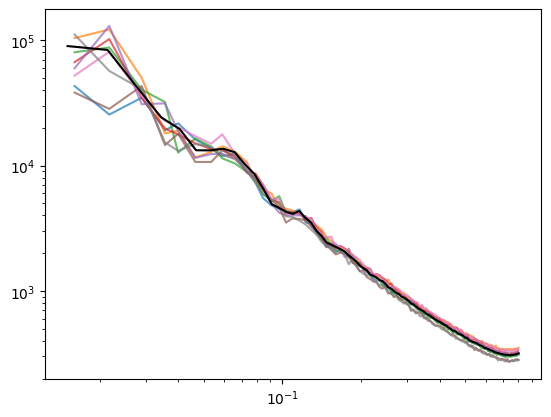

In [584]:


sys.path.append('../../galmodel/code/utils/')
import tools

fac = 2

kfull, pfull = tools.power(f/f.mean(), boxsize=1000)
mesh = ArrayMesh(f/f.mean(), BoxSize=1000)
pfull = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000 ).power
kfull, pfull = pfull['k'], pfull['power'].real

pfullnb = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000*fac ).power
pfullnb4 = FFTPower(mesh, mode='1d', dk=4*np.pi/1000, kmin=2*np.pi/1000*fac ).power


# x0, x1 = 0, 128
# y0, y1 = 0, 128
# z0, z1 = 0, 128
fac = 2
nc = 256 // fac 
psubs = []
psubsnb = []
for i in range(fac):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(fac):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(fac):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            box = sub*1.
            print('mean : ', box.mean())
            # ksub, psub = tools.power(box/box.mean(), boxsize=1000/fac)
            # mesh = ArrayMesh(box/box.mean(), BoxSize=1000/fac)
            # psubs.append(psub)
            # plt.plot(ksub, psub, alpha=0.7)
            mesh = ArrayMesh(box / box.mean()-1, BoxSize=1000/fac)
            pk = FFTPower(mesh, mode='1d', dk=2*np.pi/1000, kmin=2*np.pi/1000 ).power
            psubsnb.append(pk['power'].real)
            ksubsnb = pk['k']
            plt.plot(ksubsnb, psubsnb[-1], alpha=0.7)
            
plt.plot(kfull[1:], pfull[1:], 'k')
plt.loglog()



In [556]:
fac = 2
nc = 256 // fac 
psubsnb2 = []
for i in range(fac):
    x0, x1 = nc*i, nc*(i+1)
    
    for j in range(fac):
        y0, y1 = nc*j, nc*(j+1)
    
        for ik in range(fac):
            z0, z1 = nc*ik, nc*(ik+1)            
            
            print(x0, x1, y0, y1, z0, z1)
            sub = f[x0:x1, y0:y1, z0:z1]
            sub = sub/sub.mean() - 1.
            box = np.pad(sub, ((0, grid//2), (0, grid//2), (0, grid//2)))
            mesh = ArrayMesh(box , BoxSize=BoxSize)

            kmin2, kF2 = 2*np.pi/BoxSize *fac, 2*np.pi/BoxSize *fac,     
            pk = FFTPower(mesh, mode='1d', kmin=kmin2, dk=kF2).power
            psubsnb2.append(pk['power'].real)
            ksubsnb2 = pk['k']
            


0 128 0 128 0 128
0 128 0 128 128 256
0 128 128 256 0 128
0 128 128 256 128 256
128 256 0 128 0 128
128 256 0 128 128 256
128 256 128 256 0 128
128 256 128 256 128 256


(0.01, 0.8)

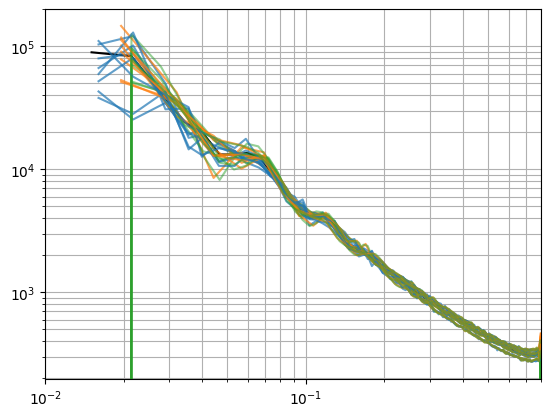

In [609]:

plt.plot(kfull[1:], pfull[1:], 'k')

ps, ips, ips2 =[], [], []

for i in range(fac**3):
    plt.plot(ksubsnb, psubsnb[i], 'C0', alpha=0.7)
    p = imm@psubsnb2[i]
    ps.append(p)
    plt.plot(ksubsnb2, p, 'C1', alpha=0.7)
    
    ip = iuspline(ksubsnb2, p, ext=1)(kfull[1:])
    ip2 = np.exp(iuspline(np.log(ksubsnb2), np.log(p), ext=1)(np.log(kfull[1:])))
    # ip = np.interp(kfull[1:], ksubsnb2, p)
    ip2[ip2 == 1] = 0
    ips.append(ip)
    ips2.append(ip2)
    plt.plot(kfull[1:], ip, 'C2', alpha=0.5)
    
ps = np.array(ps)
ips = np.array(ips)
ips2 = np.array(ips2)
plt.loglog()

plt.grid(which='both')
plt.xlim(0.01, 0.8)

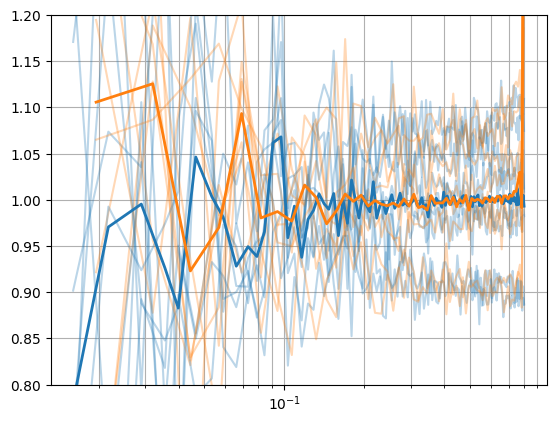

In [588]:

# plt.plot(kfull[1:], pfull[1:], 'k')

for i in range(fac**3):
    plt.plot(ksubsnb, psubsnb[i]/np.interp(ksubsnb, kfull[1:], pfull[1:]), 'C0', alpha=0.3)
    plt.plot(ksubsnb2, imm@psubsnb2[i]/np.interp(ksubsnb2, kfull[1:], pfull[1:]), 'C1', alpha=0.3)

plt.plot(ksubsnb, np.array(psubsnb).mean(axis=0)/np.interp(ksubsnb, kfull[1:], pfull[1:]), 'C0', alpha=1, lw=2)
plt.plot(ksubsnb2, ps.mean(axis=0)/np.interp(ksubsnb2, kfull[1:], pfull[1:]), 'C1', alpha=1, lw=2)

# plt.loglog()
plt.ylim(0.8, 1.2)
# plt.xlim(0.1, 0.6)
plt.semilogx()
plt.grid(which='both')


In [583]:
kfull.shape

(256,)

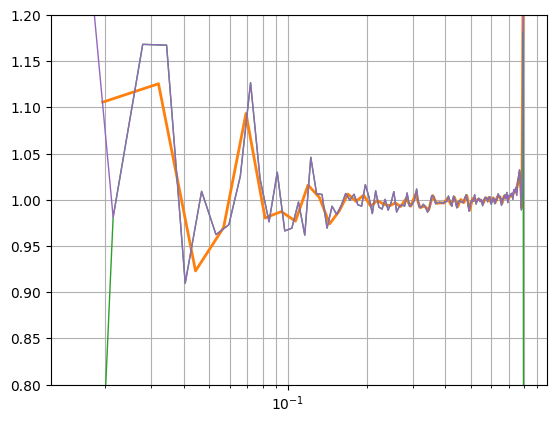

In [629]:

# plt.plot(kfull[1:], pfull[1:], 'k')

# plt.plot(ksubsnb, np.array(psubsnb).mean(axis=0)/np.interp(ksubsnb, kfull[1:], pfull[1:]), 'C0', alpha=1, lw=2)
plt.plot(ksubsnb2, ps.mean(axis=0)/np.interp(ksubsnb2, kfull[1:], pfull[1:]), 'C1', alpha=1, lw=2)
plt.plot(kfull[1:], ips.mean(axis=0)/pfull[1:], 'C2', alpha=1, lw=1)
# plt.plot(kfull[1:], ips2.mean(axis=0)/pfull[1:], 'C3', alpha=1, lw=1)

plt.plot(kfull[1:], iuspline(ksubsnb2, ps.mean(axis=0))(kfull[1:])/pfull[1:], 'C4', alpha=1, lw=1)

# plt.loglog()
# plt.ylim(0.95, 1.05)
plt.ylim(0.8, 1.2)
# plt.xlim(0.1, 0.6)
plt.semilogx()
plt.grid(which='both')

## load all sims

In [634]:
# psubs = []
# for i in range(2000):
#     psubs.append(np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/{i:04d}/power_split{fac}-deconv-interp.npy'))
# psubs = np.array(psubs)

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power_split{fac}-deconv.npy', psubs)
fac = 2
psubs_og = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power_split{fac}.npy')
ksubs_og = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split{fac}.npy')
psubs = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power_split{fac}-deconv.npy')
ksubs = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split{fac}-deconv.npy')
ptrue = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power.npy')[..., 1]
ktrue = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k.npy')
ptrue2 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power-dk2.npy')[..., 1]
ktrue2 = np.load(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/power-dk2.npy')[0, ..., 0]


[]

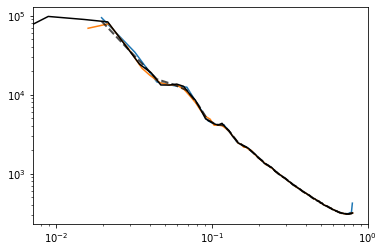

In [18]:
i = 0 

plt.plot(ksubs, psubs.mean(axis=1)[i])
plt.plot(ksubs_og, psubs_og.mean(axis=1)[i])
plt.plot(ktrue, ptrue[i], 'k')
plt.plot(ktrue2, ptrue2[i], 'k--', lw=2, alpha=0.7)
plt.loglog()

In [19]:
ratios = []
for i in range(2000):
    ratios.append(psubs[i].mean(axis=0) / np.interp(ksubs, ktrue, ptrue[i]))
ratios = np.array(ratios)

ratiosdk2 = []
for i in range(2000):
    ratiosdk2.append(psubs[i].mean(axis=0) /  ptrue2[i])
ratiosdk2 = np.array(ratiosdk2)

ratios_og = []
for i in range(2000):
    ratios_og.append(psubs_og[i].mean(axis=0) / np.interp(ksubs_og, ktrue, ptrue[i]))
ratios_og = np.array(ratios_og)

In [20]:
ipksubs = []
for i in range(2000):
    ipksubs.append([iuspline(ksubs, p)(ktrue) for p in psubs[i]])
ipksubs = np.array(ipksubs )

In [21]:
ratios2 = []
for i in range(2000):
    ratios2.append(ipksubs[i].mean(axis=0) / ptrue[i])
ratios2 = np.array(ratios2)

/tmp/ipykernel_3262052/16509825.py:3: RuntimeWarning: divide by zero encountered in divide
  ratios2.append(ipksubs[i].mean(axis=0) / ptrue[i])


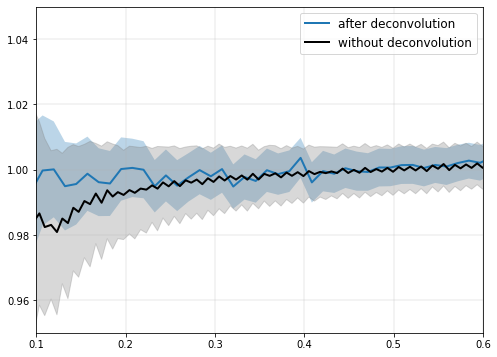

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(ksubs, ratios.mean(axis=0), lw=2, label='after deconvolution')
# plt.plot(ktrue, ratios2.mean(axis=0), lw=2, label='after deconvolution')
# plt.plot(ksubs, ratiosdk2.mean(axis=0), lw=2, alpha=0.5)
plt.plot(ksubs_og, ratios_og.mean(axis=0), lw=2, color='k', label='without deconvolution')
plt.fill_between(ksubs, ratios.mean(axis=0) - ratios.std(axis=0), ratios.mean(axis=0) + ratios.std(axis=0), alpha=0.3)
# plt.fill_between(ktrue, ratios2.mean(axis=0) - ratios2.std(axis=0), ratios2.mean(axis=0) + ratios2.std(axis=0), alpha=0.3)
plt.fill_between(ksubs_og, ratios_og.mean(axis=0) - ratios_og.std(axis=0), ratios_og.mean(axis=0) + ratios_og.std(axis=0), alpha=0.3, color='gray')
plt.xlim(0.1, 0.6)
plt.ylim(0.95, 1.05)
plt.grid(which='both', lw=0.3)
plt.legend(fontsize=12)

In [23]:
rj, irj = {}, {}

for j in range(1, 9):
    ratiosj = []
    iratiosj = []
    for i in range(2000):
        ratiosj.append(psubs[i,  :j].mean(axis=0) / np.interp(ksubs, ktrue, ptrue[i]))
        iratiosj.append(iuspline(ksubs, psubs[i,  :j].mean(axis=0))(ktrue)/ptrue[i])
    ratiosj = np.array(ratiosj)
    iratiosj = np.array(iratiosj)
    rj[j] = ratiosj
    irj[j] = iratiosj


/tmp/ipykernel_3262052/2975876289.py:8: RuntimeWarning: divide by zero encountered in divide
  iratiosj.append(iuspline(ksubs, psubs[i,  :j].mean(axis=0))(ktrue)/ptrue[i])


In [723]:
# for j in range(1, 9):
#     print(j)
#     plt.plot(ksubs, ratios.mean(axis=0), 'k', lw=2)
#     plt.fill_between(ksubs, ratios.mean(axis=0) - ratios.std(axis=0), ratios.mean(axis=0) + ratios.std(axis=0), alpha=0.3)
#     plt.plot(ksubs, rj[j].mean(axis=0), lw=1)
#     plt.errorbar(ksubs, rj[j].mean(axis=0), rj[j].std(axis=0), elinewidth=1)

#     plt.xlim(0.1, 0.6)
#     plt.ylim(0.95, 1.05)
#     plt.grid(which='both', lw=0.3)
#     plt.show()

1


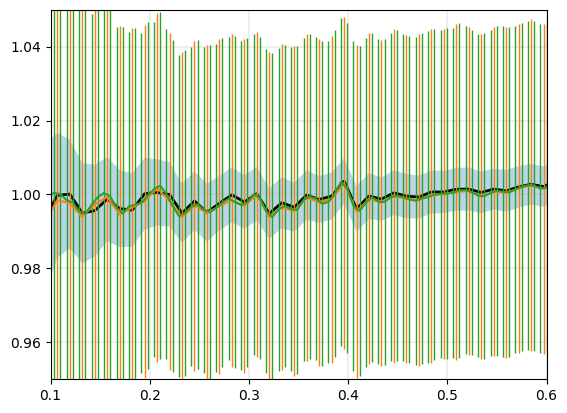

2


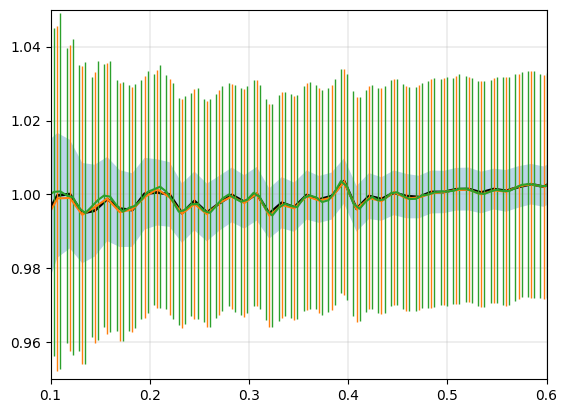

3


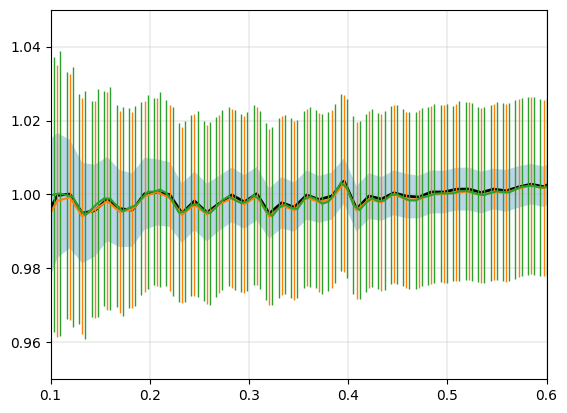

4


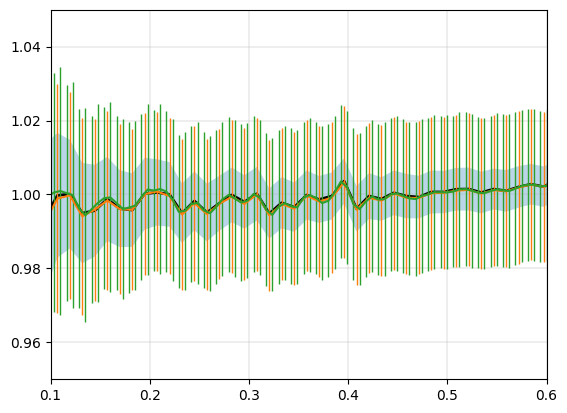

5


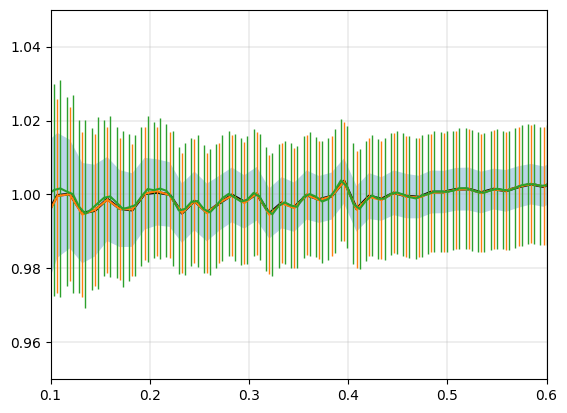

6


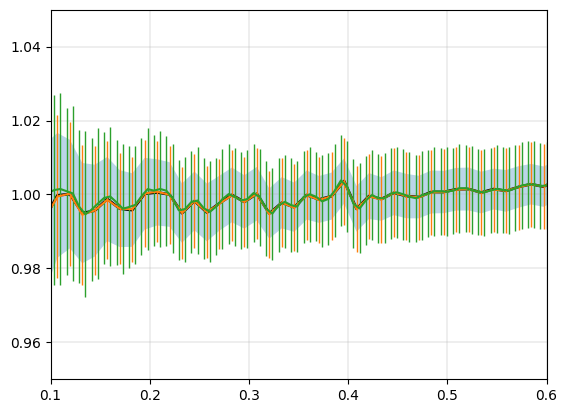

7


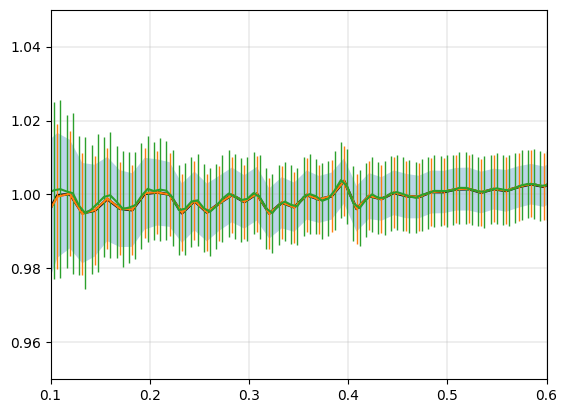

8


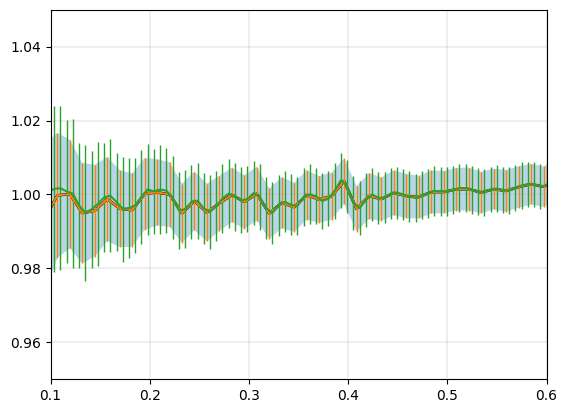

In [722]:
for j in range(1, 9):
    print(j)
    plt.plot(ksubs, ratios.mean(axis=0), 'k', lw=2)
    plt.fill_between(ksubs, ratios.mean(axis=0) - ratios.std(axis=0), ratios.mean(axis=0) + ratios.std(axis=0), alpha=0.3)
    plt.errorbar(ksubs, rj[j].mean(axis=0), rj[j].std(axis=0), elinewidth=1, color='C1')
    plt.errorbar(ktrue, irj[j].mean(axis=0), irj[j].std(axis=0), elinewidth=1, color='C2')

    plt.xlim(0.1, 0.6)
    plt.ylim(0.95, 1.05)
    plt.grid(which='both', lw=0.3)
    plt.show()

In [688]:
len(ktrue)

128

In [689]:
# np.save(f'/mnt/ceph/users/cmodi/Quijote/latin_hypercube_HR/matter/N0256/k_split2-deconv-interp.npy', ktrue)